In [1]:
%matplotlib inline

import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

today = pd.datetime.strftime(pd.datetime.today(),'%Y%m%d')

In [2]:
import traj_visualise
#from visualise import gen_kml

In [3]:
""" not using this to visualize
from mpl_toolkits.basemap import Basemap
"""

' not using this to visualize\nfrom mpl_toolkits.basemap import Basemap\n'

In [4]:
# read data and convert timestamps
data_dir = '../data/traj'
photo_table = os.path.join(data_dir, 'Melb-table1.csv')
traj_table = os.path.join(data_dir, 'Melb-table2.csv')
traj = pd.read_csv(photo_table, delimiter=',', parse_dates=[3], skipinitialspace=True)
traj_stats = pd.read_csv(traj_table, delimiter=',', parse_dates=[3,5], skipinitialspace=True)
traj_stats['Total_Time(HH:MM:SS)'] = traj_stats['Total_Time(HH:MM:SS)'] - pd.to_datetime(today) 
#convert datetime to time delta
traj_stats['Total_Time(HH:MM:SS)'] = traj_stats['Total_Time(HH:MM:SS)'].astype('timedelta64[m]')
traj_stats.rename(columns={'Total_Time(HH:MM:SS)':'Total_Time(min)'}, inplace=True)

In [5]:

traj.head()

,Trajectory_ID,Photo_ID,User_ID,Timestamp,Longitude,Latitude,Accuracy,Marker(photo=0,video=1),URL
0,0,4581420457,10033564@N03,2010-05-03 16:49:44,144.965286,-37.813581,11,0,http://www.flickr.com/photos/10033564@N03/4581...,NaN
1,0,4582049864,10033564@N03,2010-05-03 17:12:37,144.965286,-37.813581,11,0,http://www.flickr.com/photos/10033564@N03/4582...,NaN
2,0,4581421585,10033564@N03,2010-05-03 17:39:01,144.965286,-37.813581,11,0,http://www.flickr.com/photos/10033564@N03/4581...,NaN
3,0,4582050898,10033564@N03,2010-05-03 17:39:27,144.965286,-37.813581,11,0,http://www.flickr.com/photos/10033564@N03/4582...,NaN
4,1,4582051334,10033564@N03,2010-05-04 08:33:23,144.965286,-37.813581,11,0,http://www.flickr.com/photos/10033564@N03/4582...,NaN


In [6]:
traj['Trajectory_ID'].describe()

count    162608.000000
mean       9734.789918
std        5366.099398
min           0.000000
25%        4518.000000
50%       10003.500000
75%       14639.000000
max       19249.000000
Name: Trajectory_ID, dtype: float64

number and % of points at max accuracy (16) 76010 0.467443176227
number and % of points at accuracy >=12 153963 0.946835334055


array([<matplotlib.axes._subplots.AxesSubplot object at 0x103946090>], dtype=object)

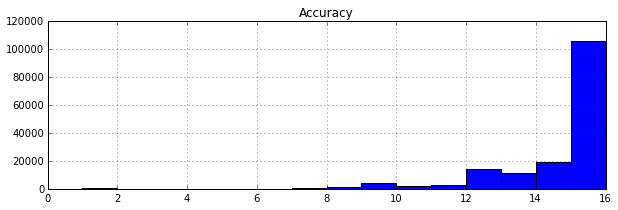

In [7]:
#print traj['Accuracy'].describe()
print "number and % of points at max accuracy (16)", len(traj[traj['Accuracy']==16]), 1.*len(traj[traj['Accuracy']==16])/len(traj)
print "number and % of points at accuracy >=12", len(traj[traj['Accuracy']>=11]), 1.*len(traj[traj['Accuracy']>=11])/len(traj)

ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
#plt.rcParams["figure.figsize"] = [10,3]
traj.hist(column=['Accuracy'], bins=15, ax=ax1)

In [8]:
traj_stats.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
0,0,10033564@N03,4,2010-05-03 16:49:44,0,49,0
1,1,10033564@N03,18,2010-05-04 08:33:23,0,631,0
2,2,10033564@N03,17,2010-05-05 10:06:12,0,207,0
3,3,10039304@N05,1,2011-04-09 11:12:16,0,0,0
4,4,10058801@N06,4,2008-05-11 22:34:56,0,9,0


In [9]:
traj_stats.tail()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
19245,19245,9989843@N07,25,2010-05-30 08:49:57,129.273375,901,8.603408
19246,19246,9989843@N07,20,2010-06-10 18:53:29,0.000000,152,0.000000
19247,19247,9989843@N07,9,2010-06-14 17:45:57,0.000000,307,0.000000
19248,19248,9989843@N07,46,2010-06-18 20:03:48,0.000000,167,0.000000
19249,19249,99971580@N00,1,2006-11-22 10:35:58,0.000000,0,0.000000


## Number of users, trajectories, and average trajectories per user

In [10]:
num_user = traj_stats['User_ID'].unique().size
num_traj = traj_stats['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

('# users :', 2458)
('# trajectories :', 19250)
('Average trajectories per user :', 7)


## Compute Simple Stats

In [11]:
basic_stats = pd.DataFrame([traj_stats.min(), traj_stats.max(), traj_stats.median(), traj_stats.mean()], \
                           index=['min','max', 'median', 'mean'])
basic_stats.drop('Start_Time', axis=1, inplace=True)
basic_stats.drop('Trajectory_ID', axis=1, inplace=True)
basic_stats.drop('User_ID', axis=1, inplace=True)
basic_stats

,#Photo,Average_Speed(km/h),Total_Time(min),Travel_Distance(km)
min,1.000000,0.000000,0.000000,0.000000
max,1340.000000,332151.344536,1411.000000,366.809744
median,3.000000,0.039019,95.000000,0.074131
mean,8.447169,82.280115,187.466442,13.198710


## Remove the trajectories with only one photo
In the following analysis, we only consider the trajectories with at least 2 photos.

In [12]:
traj_stats_new = traj_stats[traj_stats['#Photo']>1]
traj_stats_new.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
0,0,10033564@N03,4,2010-05-03 16:49:44,0,49,0
1,1,10033564@N03,18,2010-05-04 08:33:23,0,631,0
2,2,10033564@N03,17,2010-05-05 10:06:12,0,207,0
4,4,10058801@N06,4,2008-05-11 22:34:56,0,9,0
5,5,10058801@N06,2,2008-09-26 22:02:47,0,0,0


In [13]:
traj_stats_new.describe()

,Trajectory_ID,#Photo,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
count,13767.000000,13767.000000,13767.000000,13767.000000,13767.000000
mean,9594.783758,11.413162,18.455377,262.128932,115.049918
std,5530.398096,25.547291,44.521753,223.910445,3776.757839
min,0.000000,2.000000,0.000000,0.000000,0.000000
25%,4805.500000,3.000000,0.004673,64.000000,0.000927
50%,9550.000000,4.000000,1.259807,224.000000,0.441300
75%,14431.500000,10.000000,9.489311,408.000000,2.959078
max,19248.000000,1340.000000,366.809744,1411.000000,332151.344536


## Remove the trajectories with zero distance

In [14]:
traj_stats3 = traj_stats_new[traj_stats_new['Travel_Distance(km)']>1e-4]
traj_stats3.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
7,7,10058801@N06,19,2008-10-11 15:56:41,0.776109,71,0.650977
8,8,10058801@N06,5,2008-11-15 16:15:26,15.874448,1,804.901578
9,9,10058801@N06,2,2010-05-09 12:30:59,6.247454,0,2811.354171
10,10,10087938@N02,16,2008-03-13 01:35:32,0.276983,169,0.097788
12,12,10087938@N02,26,2008-03-14 01:07:45,0.241673,579,0.025039


In [15]:
# look at what is happening with those extreme speed
print traj.loc[traj['Trajectory_ID'] == 8]
print 
print traj.loc[traj['Trajectory_ID'] == 9]

    Trajectory_ID    Photo_ID       User_ID            Timestamp   Longitude  \
70              8  3030768283  10058801@N06  2008-11-15 16:15:26  144.959278   
71              8  3030768441  10058801@N06  2008-11-15 16:16:21  144.828139   
72              8  3031607362  10058801@N06  2008-11-15 16:16:25  144.831948   
73              8  3030768591  10058801@N06  2008-11-15 16:16:29  144.831948   
74              8  3031607236  10058801@N06  2008-11-15 16:16:37  144.834609   

     Latitude  Accuracy  Marker(photo=0  \
70 -37.821959        16               0   
71 -37.719354        16               0   
72 -37.717716        16               0   
73 -37.717716        16               0   
74 -37.718666        16               0   

                                             video=1)  URL  
70  http://www.flickr.com/photos/10058801@N06/3030...  NaN  
71  http://www.flickr.com/photos/10058801@N06/3030...  NaN  
72  http://www.flickr.com/photos/10058801@N06/3031...  NaN  
73  http://www.f

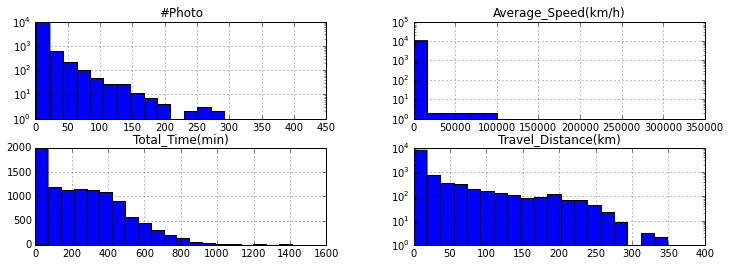

In [16]:
# plot the distribution of speed
ax3 = traj_stats3.hist(column=['Total_Time(min)', '#Photo', 'Travel_Distance(km)', 'Average_Speed(km/h)'], 
                       figsize=[12,4], bins=20)
ax3[0][0].set_yscale('log')
ax3[0][1].set_yscale('log')
ax3[1][1].set_yscale('log')

## clearly speed distribution is out of wack

In [17]:
# remove those with improbable speed
traj_stats4 = traj_stats3[traj_stats3['Average_Speed(km/h)']<=150]
print len(traj_stats4), "<--",  len(traj_stats3) , "<--" , len(traj_stats_new)

traj_stats4.head()

10202 <-- 10407 <-- 13767


,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
7,7,10058801@N06,19,2008-10-11 15:56:41,0.776109,71,0.650977
10,10,10087938@N02,16,2008-03-13 01:35:32,0.276983,169,0.097788
12,12,10087938@N02,26,2008-03-14 01:07:45,0.241673,579,0.025039
13,13,10087938@N02,4,2008-03-15 21:09:24,0.175133,322,0.032583
16,16,100895643@N03,5,2014-01-28 15:00:48,1.215878,1,39.433866


In [18]:
traj_stats4.tail()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
19236,19236,99837685@N00,8,2005-06-18 09:24:11,6.287555,634,0.594131
19237,19237,99837685@N00,9,2007-01-13 11:17:55,1.326054,439,0.181134
19240,19240,99837685@N00,4,2009-02-15 11:02:10,2.274462,92,1.477723
19244,19244,9989843@N07,63,2010-05-08 10:43:05,0.671239,382,0.105421
19245,19245,9989843@N07,25,2010-05-30 08:49:57,129.273375,901,8.603408


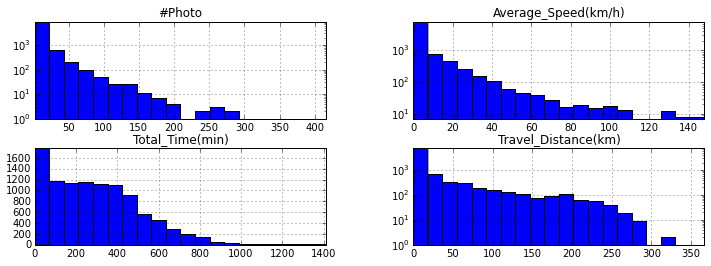

In [19]:
ax4 = traj_stats4.hist(column=['Total_Time(min)', '#Photo', 'Travel_Distance(km)', 'Average_Speed(km/h)'], 
                       figsize=[12,4], bins=20)

ax4[0][0].set_yscale('log'), ax4[0][0].autoscale(tight=True)
ax4[0][1].set_yscale('log'), ax4[0][1].autoscale(tight=True)
ax4[1][1].set_yscale('log'), ax4[1][1].autoscale(tight=True)
ax4[1][0].autoscale(tight=True)
#ax4[1].set_yscale('log')

In [20]:
traj_stats4.describe()

,Trajectory_ID,#Photo,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
count,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000
mean,9818.177514,10.453146,23.059152,298.383552,6.425342
std,5508.311970,20.045630,47.744911,220.876539,15.109785
min,7.000000,2.000000,0.000111,0.000000,0.000000
25%,5127.000000,3.000000,0.669827,117.000000,0.244168
50%,9797.500000,4.000000,3.429683,274.000000,0.997250
75%,14596.500000,9.000000,16.316325,436.000000,4.915981
max,19245.000000,416.000000,366.809744,1411.000000,147.942595


In [21]:
num_user = traj_stats4['User_ID'].unique().size
num_traj = traj_stats4['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

('# users :', 1556)
('# trajectories :', 10202)
('Average trajectories per user :', 6)


In [22]:
# build a duplicate data structure for map visualization
trajdict1, trajdict2 = traj_visualise.load_data(photo_table, traj_table)

### Let's see the longest trajectory

In [23]:
longest_dist = traj_stats4.ix[traj_stats4['Travel_Distance(km)'].idxmax()]
print longest_dist

Trajectory_ID                         9178
User_ID                       48894056@N00
#Photo                                   4
Start_Time             2009-05-24 09:48:46
Travel_Distance(km)               366.8097
Total_Time(min)                        547
Average_Speed(km/h)               40.16532
Name: 9178, dtype: object


In [24]:
longest_time = traj_stats4.ix[traj_stats4['Total_Time(min)'].idxmax()]
print longest_time

Trajectory_ID                         9891
User_ID                       52618473@N02
#Photo                                  14
Start_Time             2013-06-09 10:33:44
Travel_Distance(km)               5.111083
Total_Time(min)                       1411
Average_Speed(km/h)              0.2172592
Name: 9891, dtype: object


In [25]:
longest_numphoto = traj_stats4.ix[traj_stats4['#Photo'].idxmax()]
print longest_numphoto

Trajectory_ID                         3662
User_ID                       26670541@N07
#Photo                                 416
Start_Time             2009-10-18 11:04:42
Travel_Distance(km)                7.42588
Total_Time(min)                        244
Average_Speed(km/h)               1.822923
Name: 3662, dtype: object


In [26]:
print traj.loc[traj['Trajectory_ID'] == longest_dist['Trajectory_ID']]

       Trajectory_ID    Photo_ID       User_ID            Timestamp  \
75004           9178  3558147582  48894056@N00  2009-05-24 09:48:46   
75005           9178  6268656016  48894056@N00  2011-10-09 14:53:43   
75006           9178  6276179396  48894056@N00  2011-10-10 17:04:08   
75007           9178  6268135129  48894056@N00  2011-10-10 18:56:43   

        Longitude   Latitude  Accuracy  Marker(photo=0  \
75004  143.666453 -38.758333        14               0   
75005  144.965500 -37.816667        16               0   
75006  146.964833 -36.737833        16               0   
75007  146.953167 -36.726167        16               0   

                                                video=1)  URL  
75004  http://www.flickr.com/photos/48894056@N00/3558...  NaN  
75005  http://www.flickr.com/photos/48894056@N00/6268...  NaN  
75006  http://www.flickr.com/photos/48894056@N00/6276...  NaN  
75007  http://www.flickr.com/photos/48894056@N00/6268...  NaN  


In [27]:
print traj.loc[traj['Trajectory_ID'] == longest_dist['Trajectory_ID']]['Timestamp']

75004    2009-05-24 09:48:46
75005    2011-10-09 14:53:43
75006    2011-10-10 17:04:08
75007    2011-10-10 18:56:43
Name: Timestamp, dtype: object


In [28]:
print traj.loc[traj['Trajectory_ID'] == longest_time['Trajectory_ID']]['Timestamp']

80486    2013-06-09 10:33:44
80487    2013-06-09 12:17:24
80488    2013-06-09 12:35:16
80489    2013-06-10 13:30:09
80490    2013-06-10 15:07:23
80491    2013-06-10 21:09:01
80492    2013-06-10 21:09:20
80493    2013-06-11 01:28:59
80494    2013-06-11 08:08:40
80495    2013-06-11 09:03:27
80496    2013-06-11 09:03:46
80497    2013-06-11 09:03:55
80498    2013-06-11 09:04:03
80499    2013-06-11 10:05:15
Name: Timestamp, dtype: object


In [29]:
out_kml = os.path.join(data_dir, 'longest.kml')
traj_visualise.gen_kml(trajdict1, trajdict2, 
                       [longest_dist['Trajectory_ID'], longest_time['Trajectory_ID']], out_kml)

out_kml = os.path.join(data_dir, 'most_photos.kml')
traj_visualise.gen_kml(trajdict1, trajdict2, 
                       [longest_numphoto['Trajectory_ID']], out_kml)

In [30]:
# the user with most photos
traveler = traj.groupby('User_ID').size().idxmax()
#traj_list = traj[traj_stats4.User_ID == traveler].Trajectory_ID.unique ()

print traveler, traj.groupby('User_ID').size().max()

traveler_traj = traj_stats4.loc[traj_stats4['User_ID'] == traveler]

out_kml = os.path.join(data_dir, 'most_photos_user.kml')
traj_visualise.gen_kml(trajdict1, trajdict2, traveler_traj['Trajectory_ID'].tolist(), out_kml)

79925938@N00 8545


In [31]:
# random 5 trajectories

tj5 = traj_stats4.sample(n=5)

out_kml = os.path.join(data_dir, 'random5.kml')
traj_visualise.gen_kml(trajdict1, trajdict2, tj5['Trajectory_ID'].tolist(), out_kml)

       Trajectory_ID       User_ID  #Photo          Start_Time  \
4045            4045  27982139@N00       2 2006-09-04 20:46:43   
4374            4374  28566715@N06       2 2013-07-07 07:16:49   
10927          10927  57841116@N03       2 2013-05-29 09:09:23   
17809          17809  92828317@N00       2 2011-06-14 15:04:02   
3025            3025  24761036@N00       2 2008-12-07 12:44:13   

       Travel_Distance(km)  Total_Time(min)  Average_Speed(km/h)  
4045              2.272626              197             0.691527  
4374              0.013482               11             0.071378  
10927             7.348672               92             4.784811  
17809             7.986839               30            15.600987  
3025             14.838692              348             2.553503  


In [34]:
np.random.seed(22)
tj10 = traj_stats4.sample(n=10)
print tj10

out_kml = os.path.join(data_dir, 'random10.kml')
traj_visualise.gen_kml(trajdict1, trajdict2, tj10['Trajectory_ID'].tolist(), out_kml)

       Trajectory_ID       User_ID  #Photo          Start_Time  \
11467          11467  59778596@N00       5 2010-01-25 13:56:34   
8939            8939  47980775@N02       2 2013-08-17 13:53:59   
13240          13240  67867727@N03      27 2013-03-08 12:34:05   
7547            7547  42113857@N00       2 2013-12-22 14:48:22   
13447          13447  68688301@N00       2 2011-09-21 17:31:49   
11725          11725  61048402@N08       4 2012-02-28 16:44:15   
4860            4860  30265340@N00      10 2003-10-09 11:22:06   
3232            3232  25215713@N07       2 2013-07-03 12:29:18   
17452          17452  91256982@N00       2 2011-05-29 14:59:04   
12649          12649  66172503@N00      27 2013-12-22 06:12:09   

       Travel_Distance(km)  Total_Time(min)  Average_Speed(km/h)  
11467            51.099729              222            13.800377  
8939              6.923330               78             5.309755  
13240             3.813352              398             0.574805  
7547 

** Ones below are not used since it's much better to visualise on the map **

## Draw tranjectories on the map

In [8]:
x_min, x_max = traj.Latitude.min(), traj.Latitude.max()
y_min, y_max = traj.Longitude.min(), traj.Longitude.max()

longest_in_dist_id = traj_stats.ix[traj_stats['Travel_Distance(km)'].idxmax()].Trajectory_ID
longest_in_time_id = traj_stats.ix[traj_stats['Total_Time(min)'].idxmax()].Trajectory_ID

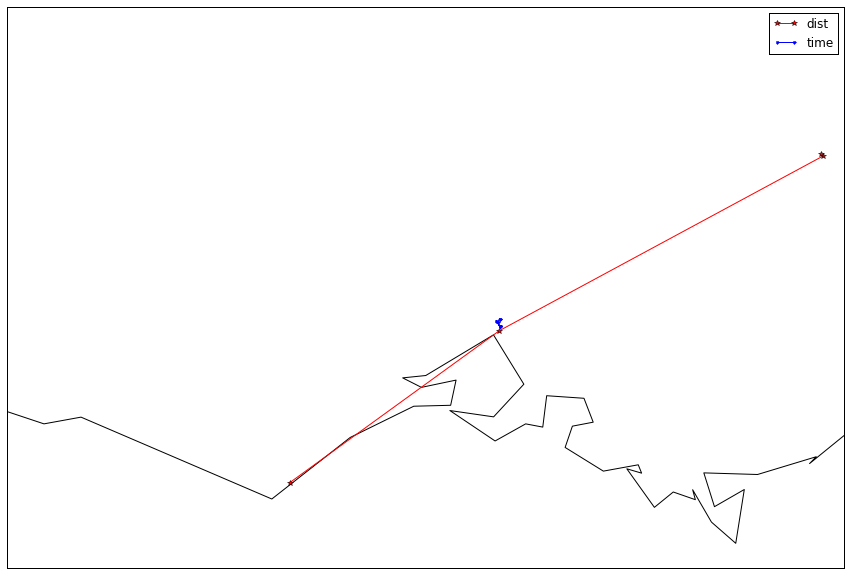

In [9]:
def plot_traj(traj_id, style, label):
    tmp = traj[traj.Trajectory_ID == traj_id]
    plt.plot(tmp.Longitude, tmp.Latitude, style, label = label)

fig = plt.figure(figsize=(15,15))
m = Basemap(projection='cyl', llcrnrlat=x_min, urcrnrlat=x_max,
        llcrnrlon=y_min, urcrnrlon=y_max, resolution='l')
m.drawcoastlines()    

plot_traj(longest_in_dist_id, 'r*-', 'dist')
plot_traj(longest_in_time_id, 'b.-', 'time')

plt.legend()

### The most travelled person

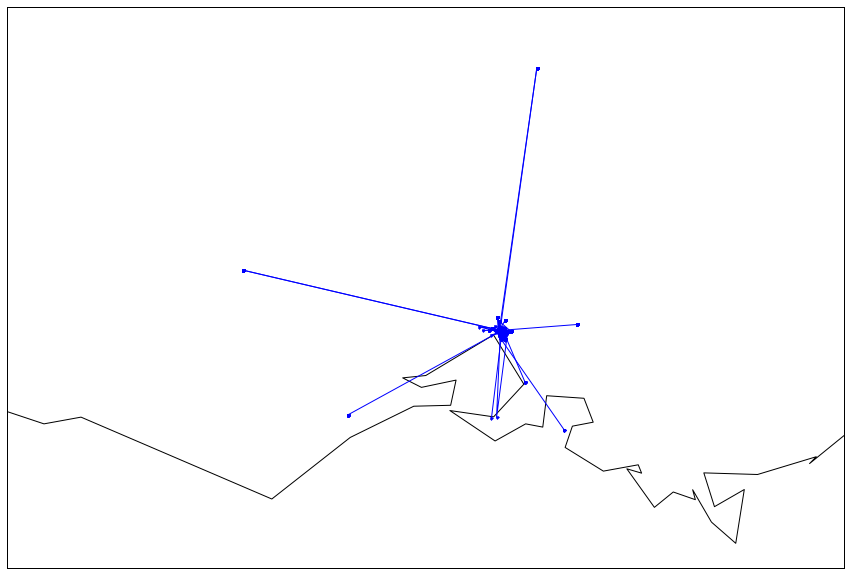

In [10]:
traveler = traj.groupby('User_ID').size().idxmax()
traj_list = traj[traj.User_ID == traveler].Trajectory_ID.unique()

fig = plt.figure(figsize=(15,15))
m = Basemap(projection='cyl', llcrnrlat=x_min, urcrnrlat=x_max,
        llcrnrlon=y_min, urcrnrlon=y_max, resolution='l')
m.drawcoastlines()    

for ti in traj_list:
    plot_traj(ti, 'b.-', str(ti))

In [13]:
num_user = traj_stats_new['User_ID'].unique().size
num_traj = traj_stats_new['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

# users : 1917
# trajectories : 13767
Average trajectories per user : 7.181533646322379


In [14]:
basic_stats_new = pd.DataFrame([traj_stats_new.min(), traj_stats_new.max(), traj_stats_new.median(), traj_stats_new.mean()], \
                           index=['min','max', 'median', 'mean'])
basic_stats_new.drop('Start_Time', axis=1, inplace=True)
basic_stats_new.drop('Trajectory_ID', axis=1, inplace=True)
basic_stats_new.drop('User_ID', axis=1, inplace=True)
basic_stats_new

,#Photo,Average_Speed(km/h),Total_Time(min),Travel_Distance(km)
min,2.000000,0.000000,0.000000,0.000000
max,1340.000000,332151.344536,1411.000000,366.809744
median,4.000000,0.441300,224.000000,1.259807
mean,11.413162,115.049918,262.128932,18.455377


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1144c15f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116baeda0>]], dtype=object)

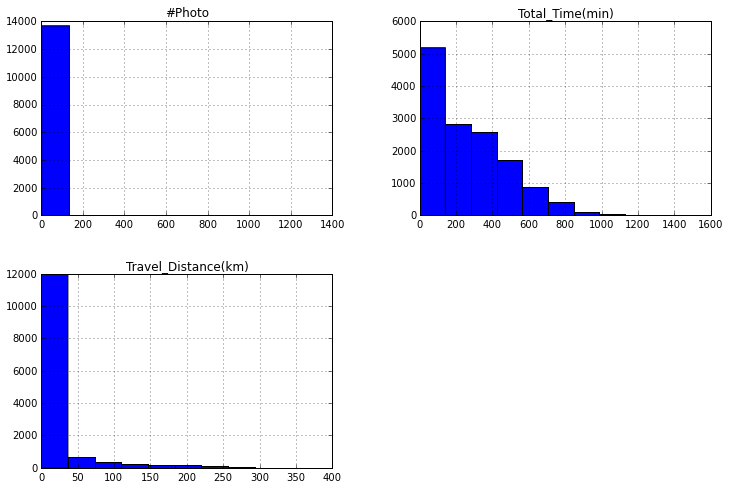

In [15]:
traj_stats_new.hist(column=['Total_Time(min)', '#Photo', 'Travel_Distance(km)'], figsize=[12,8])